## Implementação da *Fast Fourier Transform* em Python
***

Aluno: ```Alysson Machado de Oliveira Barbosa```

In [3]:
# Importação dos pacotes utilitários
import numpy as np
import matplotlib.pyplot as plt

In [5]:
def verify_power_2(x):
    '''
    Função que verifica se um número é potência de 2.

    Inputs:
        x (int) -> número a ser verificado.
    
    Returns:
        flag_verify (bool) -> retorna True caso o número seja potência de 2, caso contrário, False.
    '''

    # Se o número for negativo, retorna False
    if x <= 0:
        return False
    # Verifica se o número é divisível por 2
    while x % 2 == 0:
        x = x // 2

    # Verifica se o resultado final é 1, o que indica que era uma potência de 2
    flag_verify = x == 1
    return flag_verify

In [6]:
def my_fft(x, view_recursion = False):
    '''
    Função que calcula a FFT a partir de um sinal x(t).

    Inputs:
        x (list) -> lista contendo os valores numéricos do sinal.
        view_recursion (bool) -> flag para mostrar na tela as etapas da recursão acontecendo.
    
    Returns:
        fft (list) -> cálculo da FFT a partir do sinal x(t).
    '''

    # Obtém a dimensão do vetor de entrada
    N = len(x)

    # Verifica se o vetor de entrada é potência de 2
    if not verify_power_2(N):  raise RuntimeError('O número não é potência de 2')

    # Caso no processo interativo o tamanho do vetor for 1 (parada da recursão), retorna esse valor
    if N == 1: return x

    # Separa os elementos pares e ímpares da lista, para implementar o grafo de estrutura de borboleta da FFT
    xe, xo = list(), list()
    for i, value in enumerate(x):
        if i % 2 == False: xe.append(value)
        else: xo.append(value)
    
    # Implementa a recursão, semelhante ao processo ilustrado no grafo da estrutura de borboleta da FFT
    xe = my_fft(xe, view_recursion)
    xo = my_fft(xo, view_recursion)

    # Visualizar as etapas da recursão acontecendo
    # Dica: coloque o vetor [0,1,2,3,4,5,6,7] na entrada, fica mais fácil acompanhar os índices
    if view_recursion:
        print(f'---\nx = {x}\n xe = {xe}\n xo = {xo}')

    # Calcula o somatório da FFT separando os elementos em N/2 por simetria
    n = np.arange(N)
    Wn = np.exp((-1j) * ((2 * np.pi) / N) * n)

    first_sequence = xe + Wn[:int(N/2)] * xo
    second_sequence = xe + Wn[int(N/2):] * xo

    actual_output = np.concatenate([first_sequence, second_sequence])

    return actual_output

---
x = [0, 0]
 xe = [0]
 xo = [0]
---
x = [1, 0]
 xe = [1]
 xo = [0]
---
x = [0, 1, 0, 0]
 xe = [0.+0.j 0.+0.j]
 xo = [1.+0.j 1.+0.j]
---
x = [0, 0]
 xe = [0]
 xo = [0]
---
x = [0, 0]
 xe = [0]
 xo = [0]
---
x = [0, 0, 0, 0]
 xe = [0.+0.j 0.+0.j]
 xo = [0.+0.j 0.+0.j]
---
x = [0, 0, 1, 0, 0, 0, 0, 0]
 xe = [ 1.0000000e+00+0.0000000e+00j  6.1232340e-17-1.0000000e+00j
 -1.0000000e+00-1.2246468e-16j -1.8369702e-16+1.0000000e+00j]
 xo = [0.+0.j 0.+0.j 0.+0.j 0.+0.j]


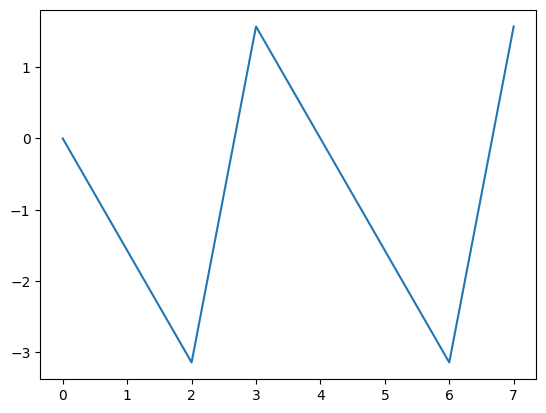

In [7]:
plt.plot(np.angle(my_fft([0,0,1,0,0,0,0,0], view_recursion = True)))